In [357]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [228]:
dailyActivity_merged = pd.read_csv('fit_data/dailyActivity_merged.csv')
dailyCalories_merged = pd.read_csv('fit_data/dailyCalories_merged.csv')
dailyIntensities_merged = pd.read_csv('fit_data/dailyIntensities_merged.csv')
dailySteps_merged = pd.read_csv('fit_data/dailySteps_merged.csv')
sleepDay_merged = pd.read_csv('fit_data/sleepDay_merged.csv')
weightLogInfo_merged = pd.read_csv('fit_data/weightLogInfo_merged.csv')


In [229]:
dailyActivity_merged.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797


In [230]:
dailyCalories_merged.head(2)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797


In [231]:
dailyIntensities_merged.head(2)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57


In [232]:
dailySteps_merged.head(2)

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735


In [233]:
sleepDay_merged.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407


In [234]:
weightLogInfo_merged.head(2)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.65,True,1462319999000


In [235]:
dailySteps_merged['Id'].nunique()

33

In [236]:
dailyActivity_merged['Id'].nunique()

33

In [237]:
dailyCalories_merged['Id'].nunique()

33

In [238]:
dailyIntensities_merged['Id'].nunique()

33

In [239]:
sleepDay_merged['Id'].nunique()

24

In [240]:
weightLogInfo_merged['Id'].nunique()

8

In [241]:
dailyActivity_merged.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [242]:
(dailyActivity_merged ==0).sum()

Id                            0
ActivityDate                  0
TotalSteps                   77
TotalDistance                78
TrackerDistance              78
LoggedActivitiesDistance    908
VeryActiveDistance          413
ModeratelyActiveDistance    386
LightActiveDistance          85
SedentaryActiveDistance     858
VeryActiveMinutes           409
FairlyActiveMinutes         384
LightlyActiveMinutes         84
SedentaryMinutes              1
Calories                      4
dtype: int64

### After quick google search and reading some articles, here's what I found

* sedentary < 5000 steps
* low active >= 5000 to 7499 steps
* somewhat active >= 7500 to 9999
* active >=10000 to 12499
* highly active >=12500

#### Now we will group the user based on average steps 

In [243]:
def active_type_filter(x):
    if x < 5000:
        return 'sedentary'
    elif x>=5000 and x<=7499:
        return 'low active'
    elif x>=7500 and x<=9999:
        return 'somewhat active'
    elif x>=10000 and x<=12499:
        return 'active'
    else:
        return 'highly active'
    

In [244]:
agg_dailySteps = dailySteps_merged.groupby(['Id'],as_index=False)['StepTotal'].agg({"average_steps":"mean"})

In [245]:
agg_dailySteps['user_type'] = agg_dailySteps['average_steps'].apply(active_type_filter)

In [499]:
agg_dailySteps.head()

,Id,average_steps,user_type
0,1503960366,12116.741935,active
1,1624580081,5743.903226,low active
2,1644430081,7282.966667,low active
3,1844505072,2580.064516,sedentary
4,1927972279,916.129032,sedentary


In [247]:
userType_percentage = agg_dailySteps.groupby(['user_type'],as_index=False)['Id'].agg({"user_count":"count"})
userType_percentage

,user_type,user_count
0,active,5
1,highly active,2
2,low active,9
3,sedentary,8
4,somewhat active,9


In [248]:
userType_percentage['percentage'] = userType_percentage['user_count'].apply(lambda x:round((x/33*100),2))
userType_percentage

,user_type,user_count,percentage
0,active,5,15.15
1,highly active,2,6.06
2,low active,9,27.27
3,sedentary,8,24.24
4,somewhat active,9,27.27


Text(0.5, 1.0, 'User Types Based On The Average Daily Steps')

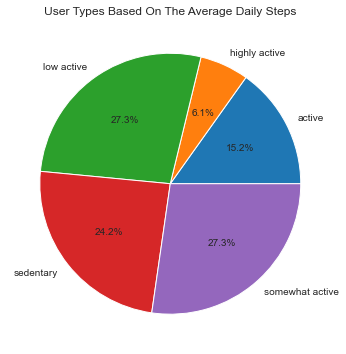

In [249]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
ax.pie(x=userType_percentage['user_count'],labels=userType_percentage['user_type'],autopct='%1.1f%%')
ax.set_title("User Types Based On The Average Daily Steps")

In [250]:

dailySteps_merged['day_of_week'] = pd.to_datetime(dailySteps_merged['ActivityDay']).dt.day_name()

In [251]:
avg_step_day = dailySteps_merged.groupby(['day_of_week'],as_index=False)['StepTotal'].agg({"average_step":"mean"})
avg_step_day

,day_of_week,average_step
0,Friday,7448.230159
1,Monday,7780.866667
2,Saturday,8152.975806
3,Sunday,6933.231405
4,Thursday,7405.836735
5,Tuesday,8125.006579
6,Wednesday,7559.373333


In [252]:
sleepDay_merged['day_of_week']=pd.to_datetime(sleepDay_merged['SleepDay']).dt.day_name()
sleepDay_df = sleepDay_merged.groupby(['day_of_week'],as_index=False)['TotalTimeInBed'].agg({"avg_bed_time":"mean"})

<AxesSubplot:title={'center':'Average step vs Day of week'}, xlabel='day_of_week', ylabel='average_step'>

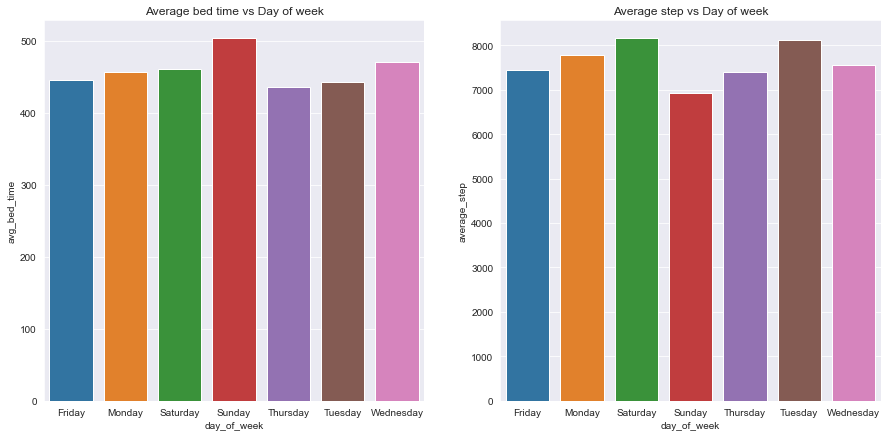

In [258]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x=sleepDay_df['day_of_week'],y=sleepDay_df['avg_bed_time'],ax=ax[0])
ax[0].set_title("Average bed time vs Day of week")
ax[1].set_title("Average step vs Day of week")
sns.barplot(x=avg_step_day['day_of_week'],y=avg_step_day['average_step'],ax=ax[1])



#### Somewhat we can observe that Sunday has highest average bed time but lowest  average step

In [263]:
sleepDay_merged['TotalSleepRecords'].unique()

array([1, 2, 3], dtype=int64)

## FInding Correlation


#### User have different pattern of sleep like some are sleeping One time a day, some two time a day and some thrice a day
#### Let's see if sleeping pattern and average steps has correlation or not

In [274]:
sleepDay_merged.drop(columns=['ActivityDay'],inplace=True)
sleepDay_merged

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week,Date
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,Tuesday,2016-04-12
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,Wednesday,2016-04-13
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,Friday,2016-04-15
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,Saturday,2016-04-16
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,Sunday,2016-04-17
...,...,...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360,Saturday,2016-04-30
409,8792009665,5/1/2016 12:00:00 AM,1,503,527,Sunday,2016-05-01
410,8792009665,5/2/2016 12:00:00 AM,1,415,423,Monday,2016-05-02
411,8792009665,5/3/2016 12:00:00 AM,1,516,545,Tuesday,2016-05-03


In [275]:
dailySteps_merged['Date'] = pd.to_datetime(dailySteps_merged['ActivityDay']).dt.date
dailySteps_merged

,Id,ActivityDay,StepTotal,day_of_week,Date
0,1503960366,4/12/2016,13162,Tuesday,2016-04-12
1,1503960366,4/13/2016,10735,Wednesday,2016-04-13
2,1503960366,4/14/2016,10460,Thursday,2016-04-14
3,1503960366,4/15/2016,9762,Friday,2016-04-15
4,1503960366,4/16/2016,12669,Saturday,2016-04-16
...,...,...,...,...,...
935,8877689391,5/8/2016,10686,Sunday,2016-05-08
936,8877689391,5/9/2016,20226,Monday,2016-05-09
937,8877689391,5/10/2016,10733,Tuesday,2016-05-10
938,8877689391,5/11/2016,21420,Wednesday,2016-05-11


In [277]:
merged_df = sleepDay_merged.merge(dailySteps_merged,how='inner',on=['Id','day_of_week','Date'])

In [279]:
merged_df.tail()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week,Date,ActivityDay,StepTotal
408,8792009665,4/30/2016 12:00:00 AM,1,343,360,Saturday,2016-04-30,4/30/2016,7174
409,8792009665,5/1/2016 12:00:00 AM,1,503,527,Sunday,2016-05-01,5/1/2016,1619
410,8792009665,5/2/2016 12:00:00 AM,1,415,423,Monday,2016-05-02,5/2/2016,1831
411,8792009665,5/3/2016 12:00:00 AM,1,516,545,Tuesday,2016-05-03,5/3/2016,2421
412,8792009665,5/4/2016 12:00:00 AM,1,439,463,Wednesday,2016-05-04,5/4/2016,2283


In [289]:
joined_sleep_step = merged_df.groupby(['TotalSleepRecords'],as_index=False).agg(average_sleep_min=('TotalMinutesAsleep','mean'),average_step=('StepTotal','mean'))
joined_sleep_step

,TotalSleepRecords,average_sleep_min,average_step
0,1,413.686649,8778.482289
1,2,453.139535,6725.930233
2,3,644.000000,5524.333333


<AxesSubplot:title={'center':'Sleep pattern vs Average steps'}, xlabel='TotalSleepRecords', ylabel='average_step'>

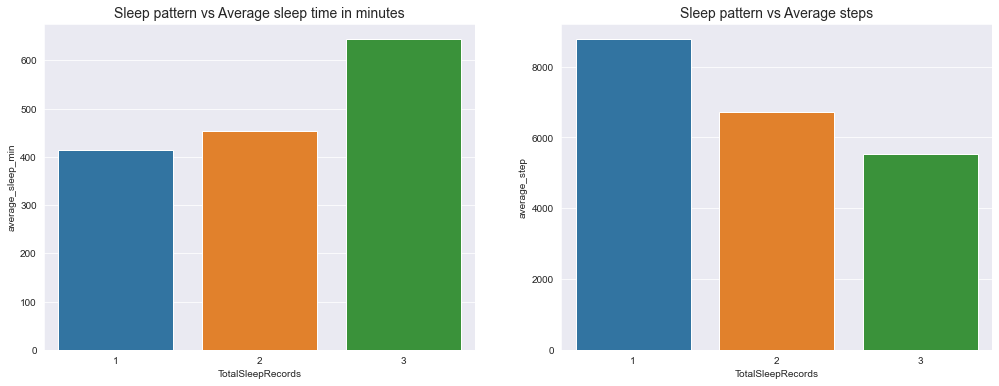

In [326]:
fig, axes = plt.subplots(1,2,figsize=(17,6))
axes[0].set_title("Sleep pattern vs Average sleep time in minutes",size=14)
axes[1].set_title("Sleep pattern vs Average steps",size=14)
sns.barplot(x=joined_sleep_step['TotalSleepRecords'],y=joined_sleep_step['average_sleep_min'],ax=axes[0])
sns.barplot(x=joined_sleep_step['TotalSleepRecords'],y=joined_sleep_step['average_step'],ax=axes[1])


#### It looks like sleeping pattern has correlation with how much a person will sleep and how much step he will walk...In fact the relationship might be more then correlation maybe it is causation, to be sure that its causation not just correlation we might have to perform further analysis  as other factos might also be involved like occupation, workplace etc. Also our data and sample is to low to conclude causation 

In [398]:
step_calories = dailyActivity_merged.loc[:,['TotalSteps','Calories']]
step_calories.describe()


,TotalSteps,Calories
count,940.000000,940.000000
mean,7637.910638,2303.609574
std,5087.150742,718.166862
min,0.000000,0.000000
25%,3789.750000,1828.500000
50%,7405.500000,2134.000000
75%,10727.000000,2793.250000
max,36019.000000,4900.000000


In [410]:
step_calories.shape

(940, 2)

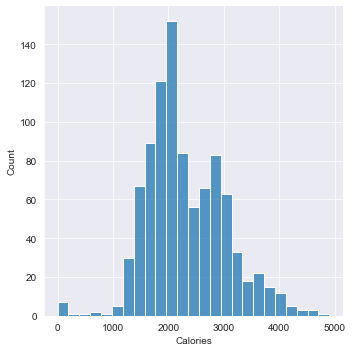

In [414]:
sns.displot(x=step_calories.Calories)

##### There are some outliers for example max value 4900 calories burned is too high for a person and some research journal flatout says that a person cannot burn calories more than 4000 so we will remove the outliers using central limit theorem as the distribution of calories looks like normal distribution

In [451]:
std_cb = np.std(step_calories['Calories']) #std_cb is standard deviation of calories burned
mean_cb = np.mean(step_calories['Calories']) #mean_cb is mean of calories burneed
upper_limit = mean_cb + std_cb*3
lower_limit = mean_cb - std_cb*3


In [452]:
cleaned_cs = step_calories[(step_calories['Calories']>=lower_limit) & (step_calories['Calories']<=upper_limit)]

In [453]:
cleaned_cs.shape

(928, 2)

##### Our dataset size shrinked after performing data cleaning...but our data still contains calories burned with value of 4000+ so you might want to console with Project manager or your colleague if you should set upper limit to 4000 or your current upper limit is fine.....But in my case, I have kept it over 4000+ as produced by the CLT 

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

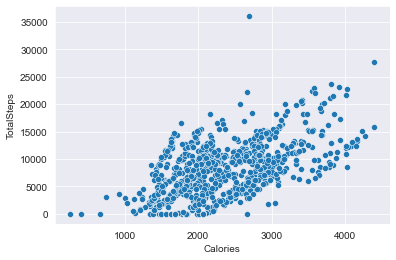

In [454]:
sns.scatterplot(x=cleaned_cs.Calories,y=cleaned_cs.TotalSteps)

#### There seems to be positive correlation between calories burned as total steps walked as the more you walk higher the calories burned will be

### MOST ACTIVE TIME?


In [330]:
hr_steps = pd.read_csv("fit_data/hourlySteps_merged.csv")

In [335]:
hr_steps.head(3)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151


In [340]:
hr_steps.shape

(22099, 3)

In [334]:
hr_steps.isna().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [346]:
hr_steps['time'] = pd.to_datetime(hr_steps['ActivityHour']).dt.time
hr_steps.head()

,Id,ActivityHour,StepTotal,time
0,1503960366,4/12/2016 12:00:00 AM,373,00:00:00
1,1503960366,4/12/2016 1:00:00 AM,160,01:00:00
2,1503960366,4/12/2016 2:00:00 AM,151,02:00:00
3,1503960366,4/12/2016 3:00:00 AM,0,03:00:00
4,1503960366,4/12/2016 4:00:00 AM,0,04:00:00


In [372]:
avg_stepTime = hr_steps.groupby(['time'],as_index=False)['StepTotal'].agg({'average_steps':'mean'})
avg_stepTime.head()

,time,average_steps
0,00:00:00,42.188437
1,01:00:00,23.102894
2,02:00:00,17.110397
3,03:00:00,6.426581
4,04:00:00,12.699571


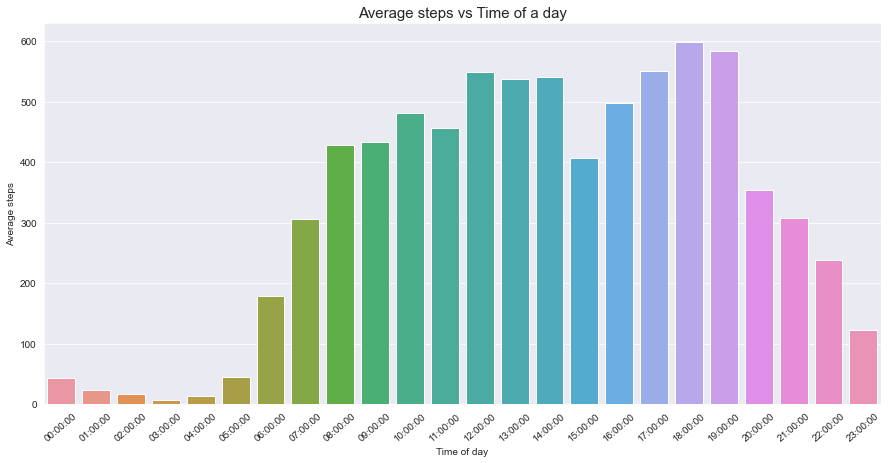

In [382]:
plt.figure(figsize=(15,7))
plt.title("Average steps vs Time of a day",size=15)
sns.barplot(x=avg_stepTime.time,y=avg_stepTime.average_steps)
plt.xlabel("Time of day")
plt.ylabel("Average steps")
plt.xticks(rotation=40);


#### Active hour seems to be from 7Am to 8PM